# COVID-19 India Analysis

## Overview

    Corona viruses are a large family of viruses that may cause respiratory illnesses in humans ranging from common colds to more severe conditions such as Severe Acute Respiratory Syndrome (SARS) and Middle Eastern Respiratory Syndrome (MERS).
    
    COVID-19 can spread from person to person usually through close contact with an infected person or through respiratory droplets that are dispersed into the air when an infected person coughs or sneezes. It may also be possible to get the virus by touching a surface or object contaminated with the virus and then touching your mouth, nose or eyes, but it is not thought to be the main way the virus spreads. Similar to other respiratory illnesses, the symptoms of COVID-19 may include fever, cough, and shortness of breath.
    
    People infected with COVID-19 may experience any range of these symptoms along with aches and pains, nasal congestion, runny nose, sore throat and diarrhea.1 Symptoms can start to show up anywhere from two to 14 days after exposure to the virus. It may be possible for an infected person who is not yet showing any symptoms to spread the virus. Older persons, and those with pre-existing medical illnesses like heart disease and diabetes, however, seem to be more likely to experience severe respiratory symptoms and complications.

## Importing Libraries and Data

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.colors as mcolors

In [89]:
df1 = pd.read_csv("AgeGroupDetails.csv")
df2 = pd.read_csv("HospitalBedsIndia.csv")
df3 = pd.read_csv("ICMRTestingLabs.csv")
df4 = pd.read_csv("IndividualDetails.csv")
df5 = pd.read_csv("StatewiseTestingDetails.csv")

## Exploratory Data Analysis
### Age Analysis

    To determine which age groups are most affected by the virus
    
    A pie chart is generated of the age distribution for confirmed cases. This validates the fact that elder people are more affected by the virus than the youth.

In [90]:
df1.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [91]:
def plot_piechart(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()), k=10)
    plt.figure(figsize=(10,10))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=10)
    plt.show()

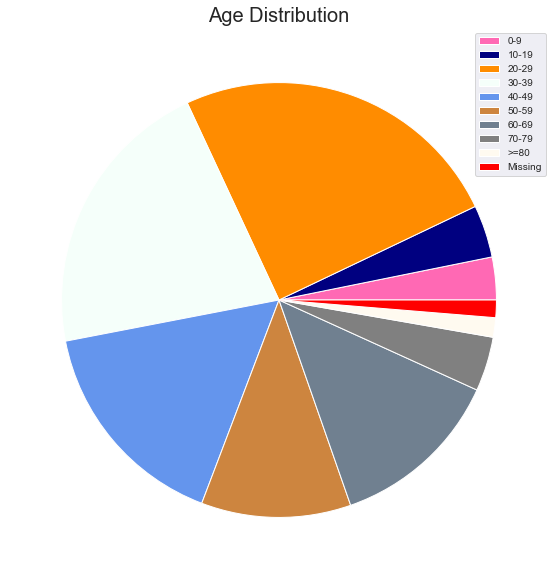

In [92]:
plot_piechart(df1["AgeGroup"], df1["TotalCases"], "Age Distribution")

    It can be clearly observed from this visualization that the majority of confirmed cases have arised in people aged 40 and above. Even though the youth population is greater than the elder population in India, an opposite share in cases tells us clearly that the virus affects the elders more than the youth.

### EDA of number of beds and healthcare facilities

    To determine which states are capable of dealing with multiple patients in case of migration
    
    Bar graphs are generated so as to observe every state's healthcare capabilty.

In [93]:
df2.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [94]:
def plot_bar_graphs(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()), k=10)
    plt.figure(figsize=(20, 12))
    plt.barh(x, y, color=c)
    plt.title(title, size=20)
    plt.xticks(size=15)
    plt.yticks(size=20)
    plt.show()

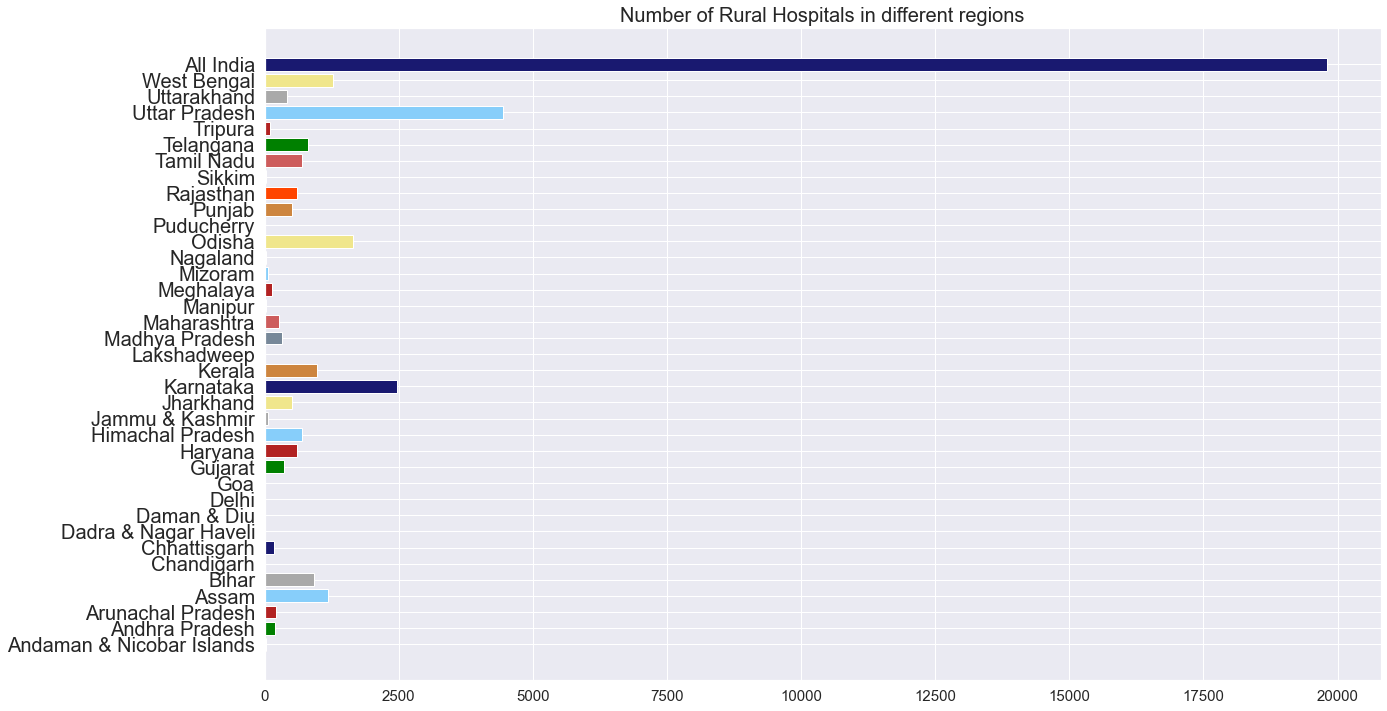

In [95]:
plot_bar_graphs(df2['State/UT'], df2['NumRuralHospitals_NHP18'], 'Number of Rural Hospitals in different regions')

    Uttar Pradesh has the most and is the only state with over 4000 rural hospitals. Karnataka follows witth around 2500 hospitals.
    
    However, number of hospitals don't tell us much about the capacity of the state and thus, we need to explore number of beds.

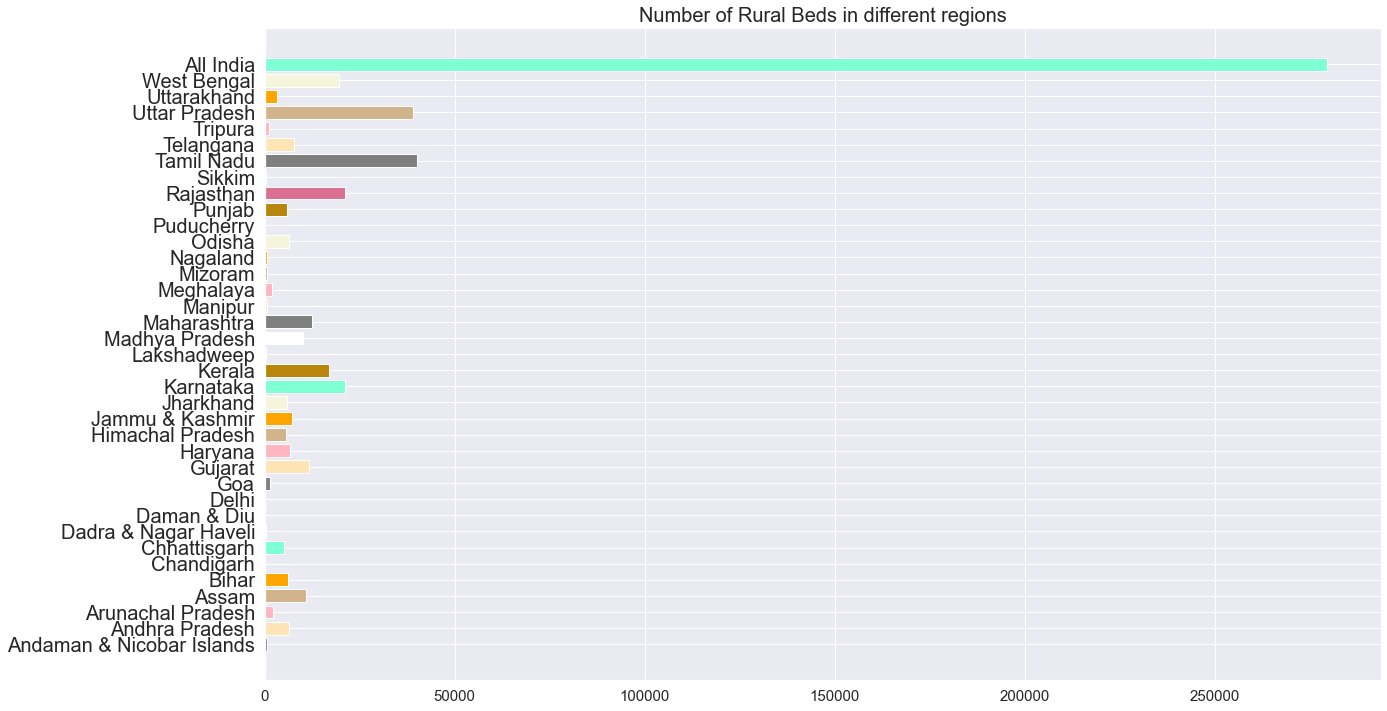

In [96]:
plot_bar_graphs(df2['State/UT'], df2['NumRuralBeds_NHP18'], 'Number of Rural Beds in different regions')

    Tamil Nadu is the state with the most Beds in the rural areas with over 40000 beds.
    Uttar Pradesh is a close second.
    Karnataka, Rajasthan and west Bengal are having more than 20000 beds and stands in third position.
    
    Now, it is also possible that labour intensive states may not want their workers to leave to prevent crisis during reopening of lockdown. Thus, exploring Urban data is also important.

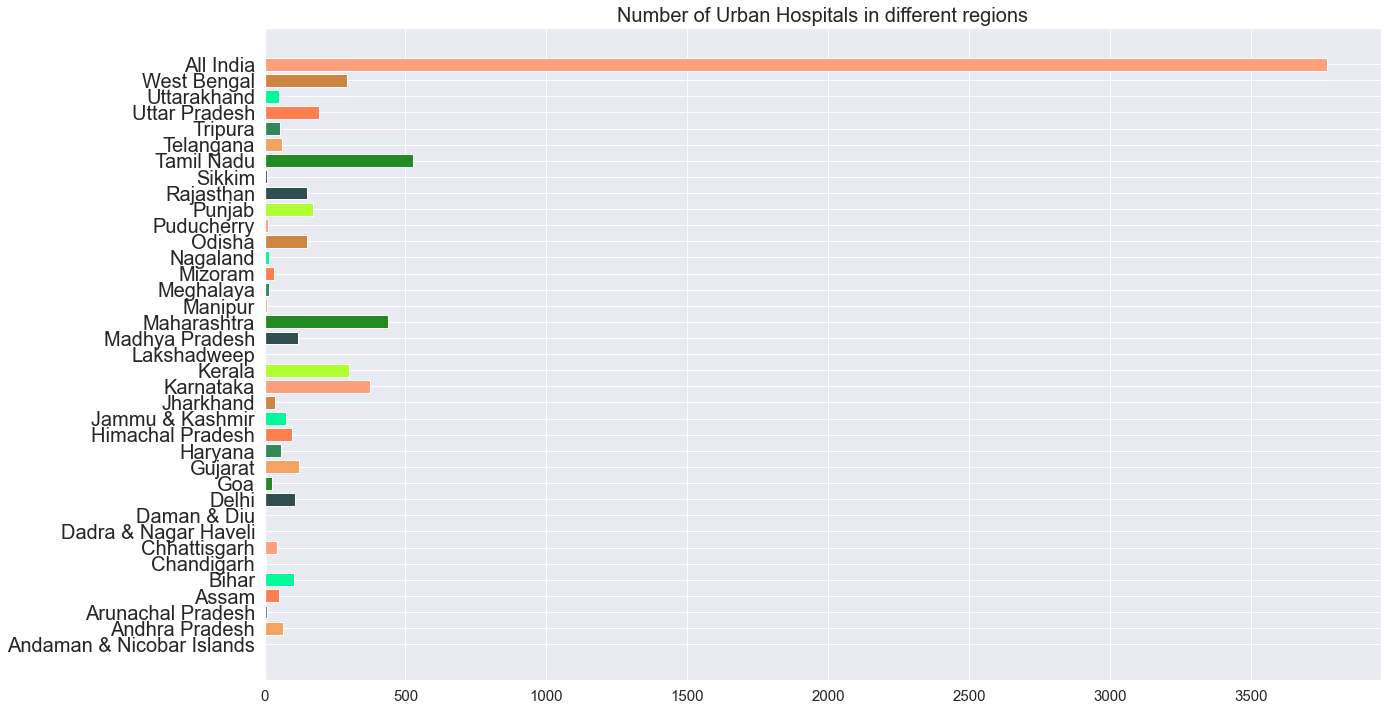

In [97]:
plot_bar_graphs(df2['State/UT'], df2['NumUrbanHospitals_NHP18'], 'Number of Urban Hospitals in different regions')

    Tamil Nadu has the most urban hospitals with over 500 of them. 
    Maharashtra is the only other state with over 400 urban hospitals followed by Karnataka with with nearly 400 urban hospitals.


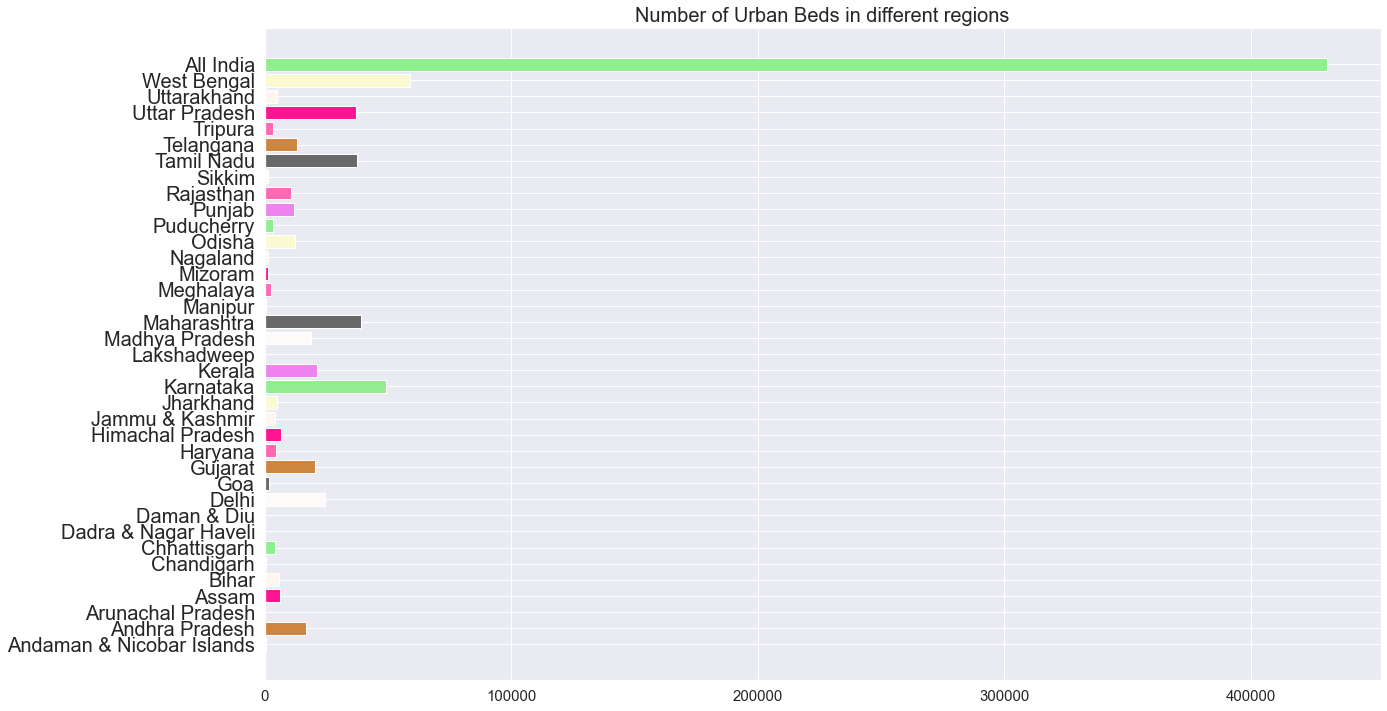

In [98]:
plot_bar_graphs(df2['State/UT'], df2['NumUrbanBeds_NHP18'], 'Number of Urban Beds in different regions')

    West Bengal has the most beds in Urban areas with almost 60000 beds.
    Karnataka in second place with reaching 50000 beds.
    Thirdly Uttar Pradesh Tamil nadu and Maharashtra with more than 38000 beds.
    
    Since, not everyone can afford private healthcare facilities, we'll explore similar data for just the public healthcare facilities.

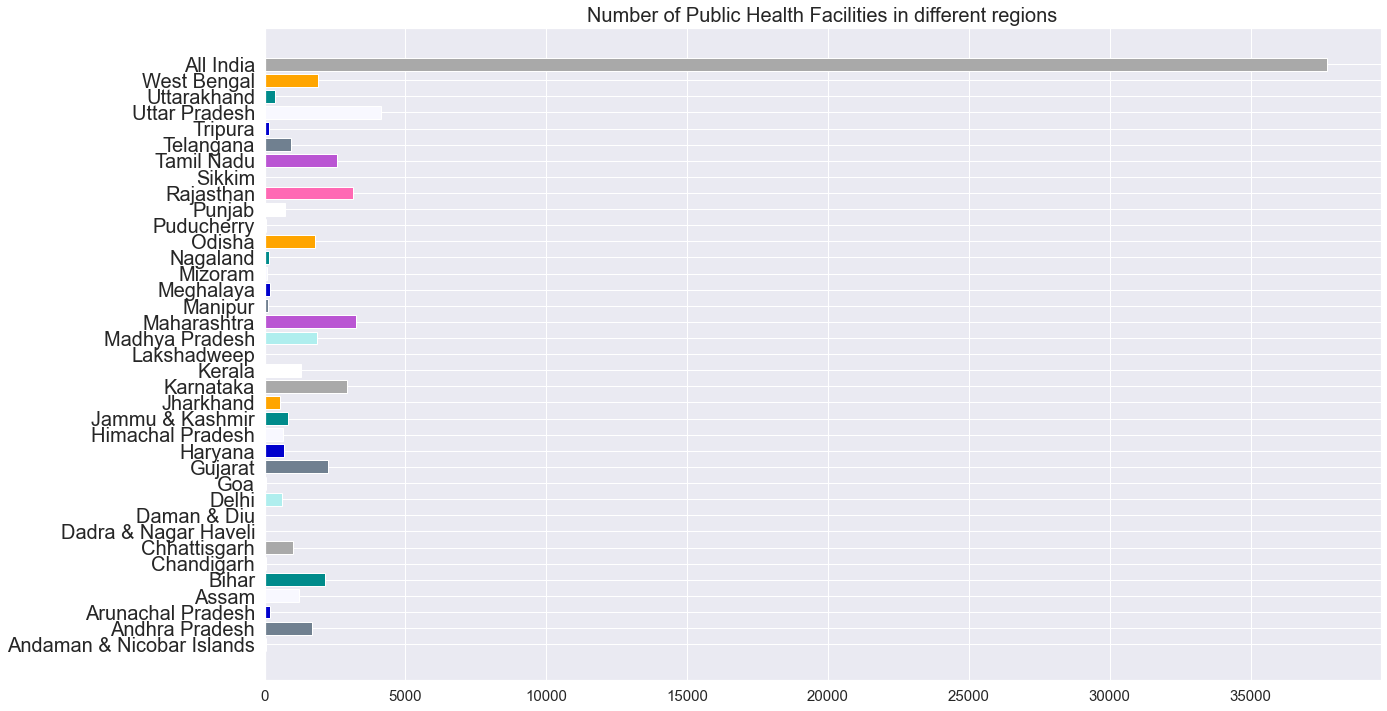

In [99]:
plot_bar_graphs(df2['State/UT'], df2['TotalPublicHealthFacilities_HMIS'], 'Number of Public Health Facilities in different regions')

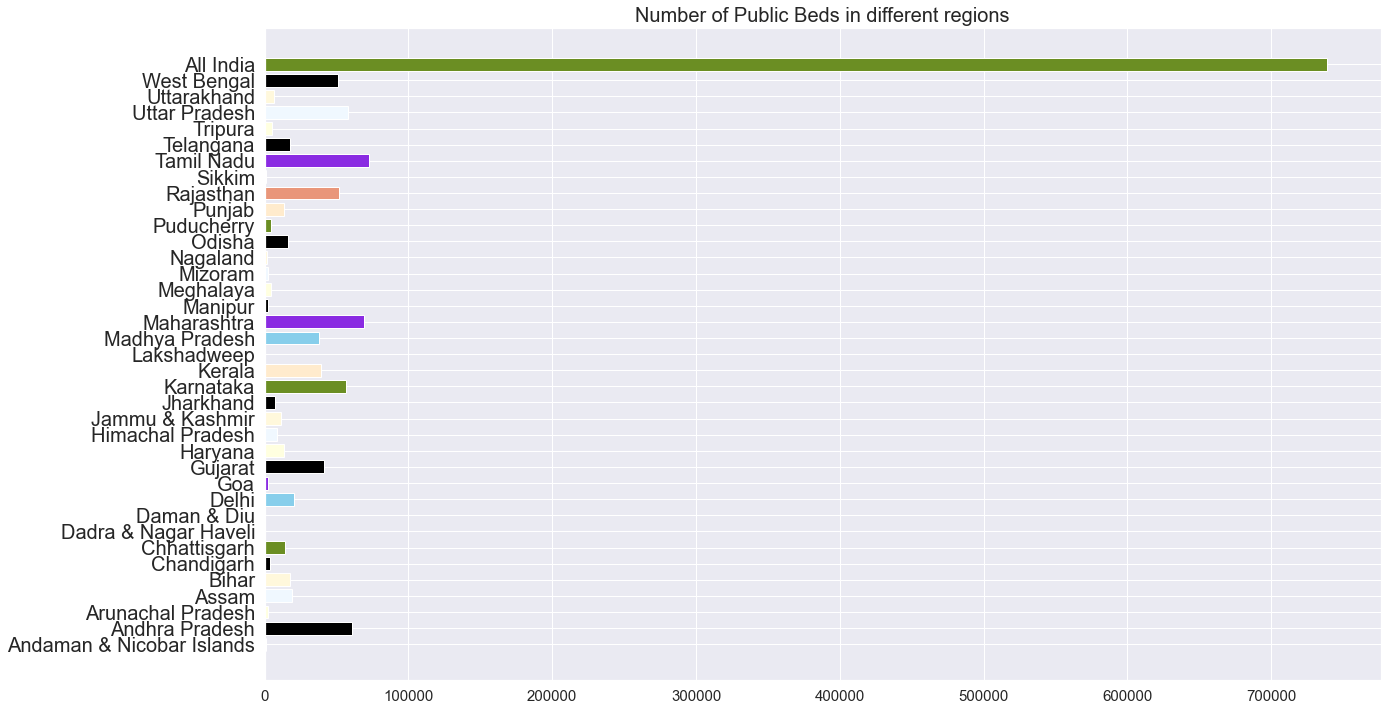

In [100]:
plot_bar_graphs(df2['State/UT'], df2['NumPublicBeds_HMIS'], 'Number of Public Beds in different regions')

    Tamil Nadu has the most public beds with over 70000 of them. 
    Maharashtra and Andhra Pradesh are the only other state with over 60000 beds.
    
    We have some states which have less number of total hospitals but most of them being in public access makes it easier for the labour to approach like Andhra Pradesh.

### Verification of information

    Seeing many arguments that states having less number of cases is due to less testing, it is important to verify this information.
    
    Assuming, we dont have testing data, we can have a look a the number of test centres across different states.

In [101]:
df3['state'].value_counts()

Maharashtra                                 39
Tamil Nadu                                  26
Telangana                                   19
Delhi                                       18
Karnataka                                   17
Uttar Pradesh                               17
Gujarat                                     14
West Bengal                                 13
Kerala                                      12
Haryana                                     11
Madhya Pradesh                              10
Rajasthan                                    9
Andhra Pradesh                               7
Odisha                                       7
Bihar                                        6
Assam                                        6
Punjab                                       5
Jammu and Kashmir                            4
Himachal Pradesh                             3
Jharkhand                                    3
Chhattisgarh                                 3
Chandigarh   

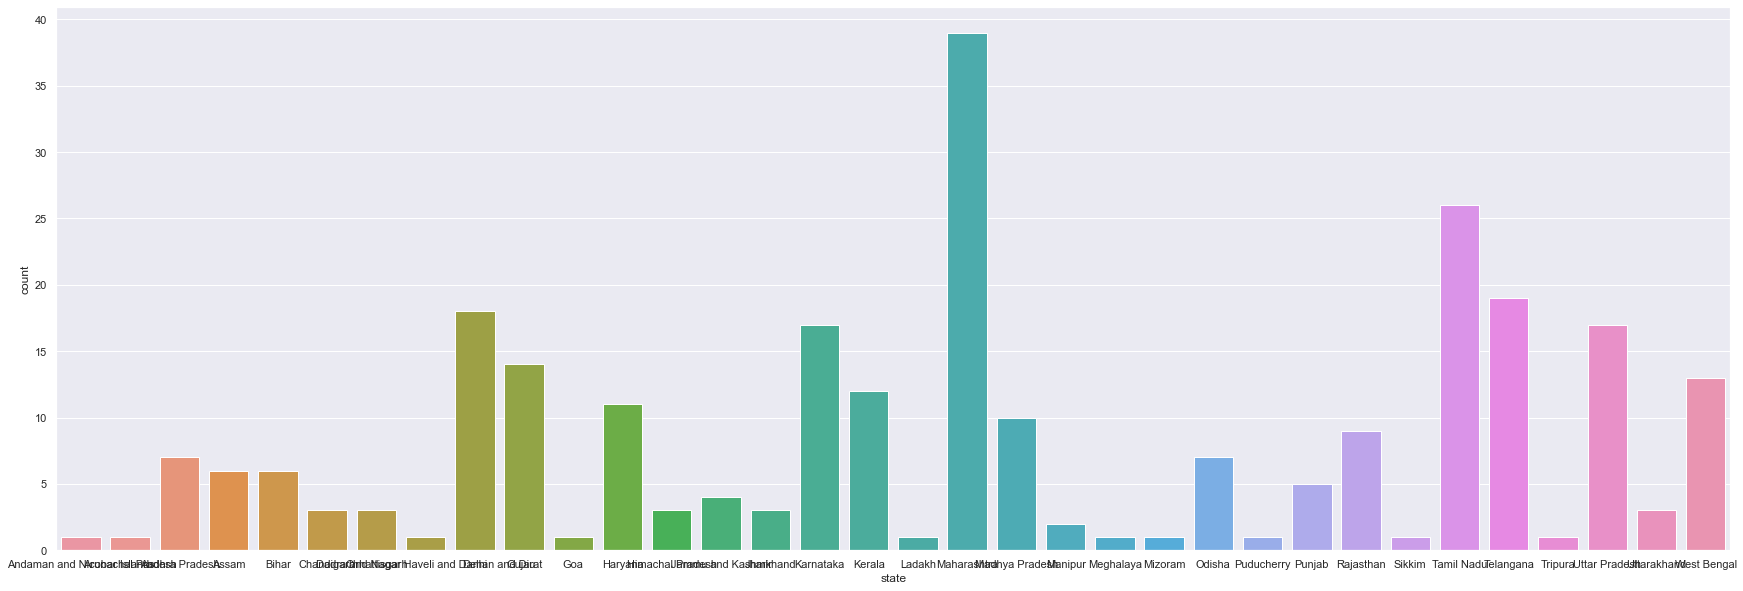

In [102]:
sns.set(rc={'figure.figsize':(30,10)})
sns.countplot(x = "state", data = df3)

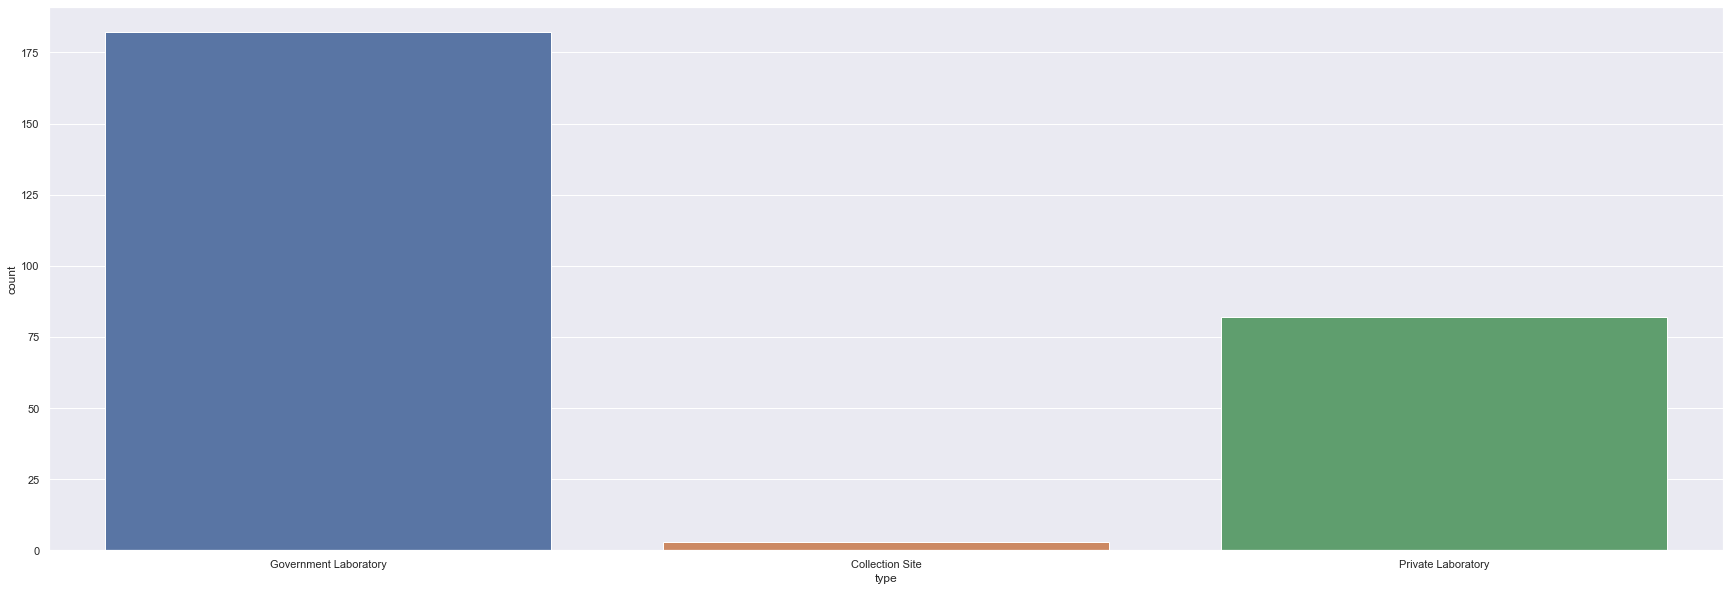

In [103]:
sns.countplot(x = "type", data = df3)

    Maharashtra has the most number of ICMR testing labs with 39 of them.
    Tamil nadu and Telangana are 2nd and 3rd with 26 and 19 respectively.

    Out of all the ICMR labs, around 180 are Government Labs and around 80 are Private Labs.
    Conclusion Needs More - In practice, we can't ignore facts like the total cases depends on your population example, Goa can never out count Delhi or Mumbai, its entire population is only 7.8 lakh people. We need to consider total population or some percentage value of it to see the positive cases.


### Validating Assumptions 

    When we assume something like We don't have testing data but we can substitute that with Test centers we need to verify if that is a valid assumption and to do that we need to see some information about their correlation as shown.

In [104]:
df5.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [105]:
df5_sort = df5.sort_values(by = 'TotalSamples', ascending=False).head()
df5_sort.head()

,Date,State,TotalSamples,Negative,Positive
1068,2020-05-20,Tamil Nadu,360068.0,3346311.0,13191.0
1067,2020-05-19,Tamil Nadu,348174.0,334839.0,12448.0
1066,2020-05-18,Tamil Nadu,337841.0,325546.0,11760.0
1065,2020-05-17,Tamil Nadu,326720.0,315019.0,11224.0
1064,2020-05-16,Tamil Nadu,313639.0,302523.0,10585.0


In [106]:
df5_sort1 = df5.sort_values(by = 'TotalSamples', ascending=True).head()
df5_sort1.head()

,Date,State,TotalSamples,Negative,Positive
765,2020-04-07,Mizoram,58.0,0.0,1.0
764,2020-04-06,Mizoram,58.0,0.0,1.0
804,2020-04-06,Nagaland,60.0,47.0,0.0
806,2020-04-11,Nagaland,70.0,70.0,0.0
805,2020-04-10,Nagaland,70.0,69.0,0.0


    Clearly, Tamil Nadu has the highest number of samples being tested.
    Mizoram and Nagaland have the lowest number of tested samples recorded for a day.
    
    We can see that towards the extremes the data is synced well as Tamil Nadu which has second highest testing facility does highest testing and Mizoram and Nagaland which have one of the lowest test centers do lowest testing.